In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import time
import statistics

## Variable Global

In [2]:
matrizDistancias = []
tiempo = 0

## Funciones Auxiliares Comunes

In [3]:
# Dado un String, Lee el archivo correspondiente
def leeArchivo(archivo):
    f = open("./tsp/" + archivo)
    x = []
    y = []
    cont = 0;
    for linea in f:
        cont += 1
        sp = linea.split(" ")
        if cont > 6 and sp[0] != "EOF\n":
            i = -2
            xp = sp[i]
            while xp == "":
                i -= 1
                xp = sp[i]
            yp = sp[-1].split("\n")
            x.append(float(xp))
            y.append(float(yp[0]))  
    return x,y

In [4]:
# Calcula la distancia entre dos puntos (x,y) - (x2,y2)
def calculaDistancia(x, y, x2, y2):
    xd = x - x2
    yd = y - y2
    return round(math.sqrt(xd*xd + yd*yd))

In [5]:
# Pinta todos los puntos recibiendo una lista de puntos x e y
def pintaMapa(x,y):
    plt.figure(figsize=(15, 8))
    plt.scatter(x,y)
    plt.show()

In [6]:
# Dado un vector de resultado, pinta el resultado de este vector sobre los puntos
def pintaCamino(v,x,y,coste):
    plt.figure(figsize=(15, 8))
    xc = []
    yc = []
    for i in v:
            xc.append(x[i])
            yc.append(y[i])
    
    xc.append(x[v[0]])
    yc.append(y[v[0]])
    
    plt.plot(xc,yc,"y")
    plt.scatter(x,y, c = "black")
    plt.scatter(xc[0],yc[0],c="green")
    plt.scatter(xc[-2],yc[-2],c="red")
    
    plt.suptitle("Mejor camino con coste " + str(coste),fontsize=20)
    
    plt.show()    

In [7]:
# Calcula matriz de distancias
def calculaMatrizDistancias(x,y):
    global matrizDistancias 
    matrizDistancias = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            matrizDistancias[i,j] = calculaDistancia(x[i],y[i],x[j],y[j])

In [8]:
# Calcula Coste del vector Solucion
def calculaCoste(vResultado):
    kms = 0;
    for i in range(1,len(vResultado)):
            kms += matrizDistancias[vResultado[i-1]][vResultado[i]]
    kms += matrizDistancias[vResultado[-1]][vResultado[0]]
    return kms

In [9]:
# Calcula Coste Vecino
def calculaCosteVecino(costeSolAntigua, sAntigua, sActual, i1, i2):
    if i1 + 1 > len(sActual) - 1:
        piv1 = 0
    else:
        piv1 = i1 + 1
    
    if i2 + 1 > len(sActual) - 1:
        piv = 0
    else:
        piv = i2 + 1
    
    
    coste = costeSolAntigua - matrizDistancias[sAntigua[i1 - 1]][sAntigua[i1]] - matrizDistancias[sAntigua[ piv1]][sAntigua[i1]]
    coste = coste - matrizDistancias[sAntigua[i2 - 1]][sAntigua[i2]] - matrizDistancias[sAntigua[piv]][sAntigua[i2]]
    coste = coste + matrizDistancias[sActual[i1 - 1]][sActual[i1]] + matrizDistancias[sActual[ piv1]][sActual[i1]]
    coste = coste + matrizDistancias[sActual[i2 - 1]][sActual[i2]] + matrizDistancias[sActual[piv]][sActual[i2]]
    return coste

In [10]:
# Genera solucion aleatoria
def solucionAleatoria(tam, num):
    vResult = list(range(0,tam))
    random.seed(num)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
    return vResult

In [11]:
# Genera solucion aleatoria
def solucionAleatoria2(tam):
    vResult = list(range(0,tam))
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
    return vResult

In [12]:
# Tic
def tic():
    global tiempo 
    tiempo = time.time()

In [13]:
# Toc
def toc():
    global tiempo 
    return  (time.time() - tiempo)

In [14]:
def representaResultados(analisisResultado, nombre):
    tablaFinal = pd.DataFrame(columns=["Semilla","Coste","Numero Evaluaciones", "Tiempo"])
    for i in range(0,10):
        tablaFinal.loc[len(tablaFinal)] = [analisisResultado[i][0],analisisResultado[i][1],analisisResultado[i][2],analisisResultado[i][3]]
    
    #tablaFinal.to_excel(nombre + ".xlsx")  
    
    display(tablaFinal)
    print("Media coste: ", tablaFinal[["Coste"]].mean()[0])
    print("Desviación típica coste: ", tablaFinal[["Coste"]].std()[0])
    print("Media numero de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].mean()[0])
    print("Desviación típica de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].std()[0])
    print("Media tiempo: ", tablaFinal[["Tiempo"]].mean()[0])
    

In [15]:
def representaResultados2(analisisResultado, nombre):
    tablaFinal = pd.DataFrame(columns=["Semilla","Coste Maximo","Coste Medio", "Coste Mínimo", "Tiempo"])
    for i in range(0,5):
        tablaFinal.loc[len(tablaFinal)] = [analisisResultado[i][0],analisisResultado[i][1],analisisResultado[i][2],analisisResultado[i][3],analisisResultado[i][4]]
    
    #tablaFinal.to_excel(nombre + ".xlsx")  
    
    display(tablaFinal)

# Fichero a Analizar

In [27]:
#x, y = leeArchivo("st70.tsp")
#x, y = leeArchivo("ch130.tsp")
x, y = leeArchivo("a280.tsp")
#x, y = leeArchivo("vm1748.tsp")
calculaMatrizDistancias(x,y)

# Algoritmo Greedy Estandar

In [28]:
# Algoritmo Greedy
def greedy(x,y,mostrar):
    tic()
    vResultado = [];
    nodosNoVisitados = list(range(0,len(x)))
    i = 0;
    vResultado.append(nodosNoVisitados[i])
    del nodosNoVisitados[i]
    while i < len(x) and nodosNoVisitados != []:
        nodoActual = vResultado[-1]
        ordenad = np.sort(matrizDistancias[nodoActual,:])
        k = 0
        encontrado = False
        
        while k < len(y) and encontrado == False:      
            minimo = np.where(ordenad[k] == matrizDistancias[nodoActual,:])
            max = len(minimo[0])
            z = 0
            while z < max and encontrado == False:
                if (minimo[0][z] in vResultado):
                    k += 1
                    z += 1
                else:
                    encontrado = True
        vResultado.append(minimo[0][z])
        nodosNoVisitados.remove(minimo[0][z])
        i += 1
    km = calculaCoste(vResultado)
    t = toc()
    # pintaMapa(x,y)
    if mostrar == "s":
        print("Tiempo de ejecucion = " + str(t))
        pintaCamino(vResultado,x,y, km)
    return vResultado, km

Tiempo de ejecucion = 0.015944719314575195


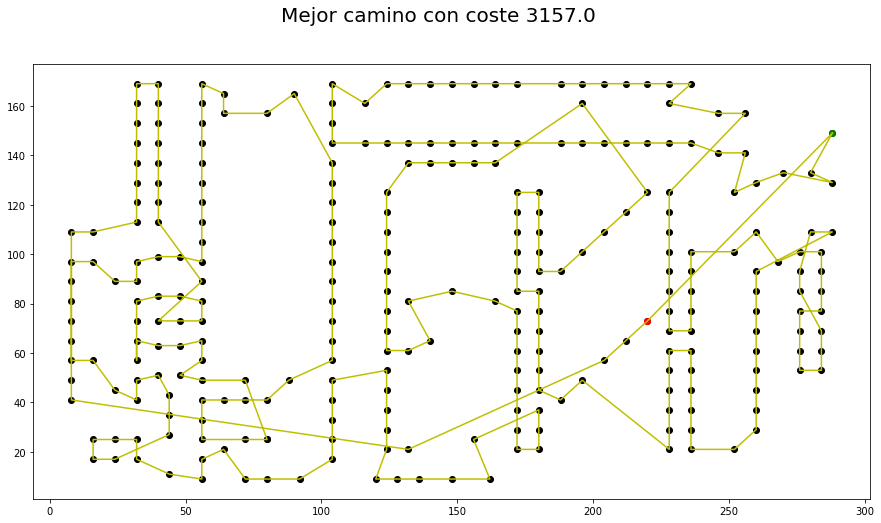

In [29]:
# Greedy
resultado, km = greedy(x, y,"s")

# Busqueda Local El Mejor

In [19]:
# Algoritmo Busqueda Local Basico
def busquedaLocalBasico(x, y, w, costeActual):
    mejorV = []
    encontrado = False
    maximo = 1600 * len(x)
    i = 0
    while encontrado == False:
        mejorV, mejorCost, i = mejorVecino(w, i, maximo)
        if mejorCost < costeActual:
            w = mejorV.copy()
            costeActual = mejorCost
        elif i > maximo or mejorCost >= costeActual:
            encontrado = True
    return w, costeActual, i

In [20]:
# Devuelve el mejor vecino
def mejorVecino(w, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste.copy()
    for i in range(0, len(w)):
        for j in range(i + 1,len(w)):
            w2 = w.copy();
            w2[i], w2[j] = w2[j], w2[i]
            coste = calculaCosteVecino(costeSolAntigua, w, w2, i, j)
            if coste < mejorCoste :
                mejor = w2
                mejorCoste = coste
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
    return mejor, mejorCoste, sumador

In [21]:
# Algoritmo Busqueda Local El Mejor
def busquedaLocalElMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = mejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado, "BL-ElMejor")
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,26991.0,448000.0,1.928318
1,1.0,26657.0,448000.0,1.888243
2,2.0,28456.0,448000.0,1.874448
3,3.0,27242.0,448000.0,1.923218
4,4.0,26300.0,448000.0,1.809702
5,5.0,26787.0,448000.0,1.715763
6,6.0,26619.0,448000.0,1.722252
7,7.0,26315.0,448000.0,1.743317
8,8.0,25229.0,448000.0,1.714220
9,9.0,28413.0,448000.0,1.958668


Media coste:  26900.9
Desviación típica coste:  970.7263546208868
Media numero de evaluaciones:  448000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  1.8278147459030152


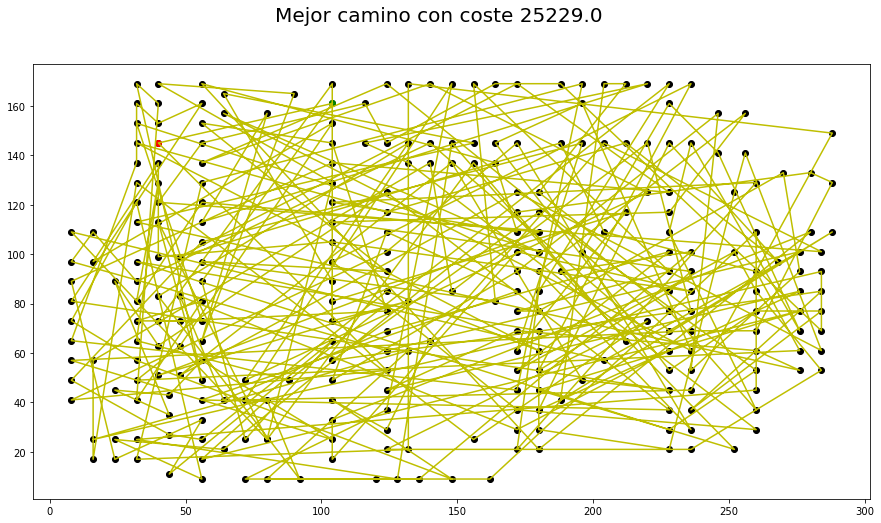

In [22]:
# Busqueda Local El Mejor
busquedaLocalElMejor(x, y)

# Algoritmos Genéticos

## Algoritmo Genético Básico

In [23]:
def seleccionTorneo(poblacion, costePobla, tamTorneo, tamPobla):
    minimo = float("inf")
    pad = 0
    for selecc in range(0, tamTorneo):
        cand = random.randint(0,tamPobla - 1)
        coste = costePobla[cand]
        if coste < minimo:
            minimo = coste
            pad = cand
    return poblacion[pad]

In [24]:
def mutaSolucion(wBest, s):
    n = len(wBest)

    pivote1 = random.randint(0,n - 1)
    pivote2 = pivote1 + s

    if pivote2 > (n - 1):
        pivote2 = n - 1

    sublista = wBest[pivote1:pivote2]

    tam = len(sublista)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        sublista[i], sublista[rnd] = sublista[rnd], sublista[i]

    wBest[pivote1:pivote2] = sublista
    return wBest

In [25]:
def cruce(padre1, padre2, porTSublista):
    
    n = len(padre1)
    
    tSublista = round(n * porTSublista)
    
    pivote1 = random.randint(0,n - 2)
    pivote2 = pivote1 + tSublista + 1
        
    if pivote2 > n:
        pivote2 = n
    
    sublista = padre1[pivote1:pivote2]
       
    descendiente = list(range(0,n))
    descendiente[pivote1:pivote2] = sublista
    
    for i in range(0,n):
        if i < pivote1 or i >= pivote2:
            for k in range(0,len(padre2)):
                ciu = padre2[k]
                if ciu not in sublista:
                    descendiente[i] = ciu
                    padre2.remove(ciu)
                    break

    return descendiente

In [26]:
def geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, porTSublista, greed, vueltasBucle):
    analisisResultado = []
    for sem in range(0,5):
        resultadoIntermedio = []
        tic()
        semilla = ( sem + 1 ) * 50
        random.seed(semilla)
        media = []
        mejor = []

        # Creación de población inicial
        poblacion = []
        costePobla = []

        if greed == "s":
            for i in range(0, tamPobla - 1):
                solucion = solucionAleatoria2(tam)
                poblacion.append(solucion)
                costePobla.append(calculaCoste(solucion))

            # Siembro una solución greedy
            resGreedy, coste = greedy(x, y,"n")
            poblacion.append(resGreedy)
            costePobla.append(coste)
            
        else:
            for i in range(0, tamPobla):
                solucion = solucionAleatoria2(tam)
                poblacion.append(solucion)
                costePobla.append(calculaCoste(solucion))

        media.append(statistics.mean(costePobla))
        mejor.append(min(costePobla))

        encontrado = False
        cruces = 0
        numIteraciones = vueltasBucle * 2 / tamPobla
        limBuclue = ((tamPobla/2) - 0.1 * tamPobla) 

        while encontrado == False:

            nuevaPoblacion = []
            nuevoCostePoblacion = []

            iterador = 0

            while iterador <= limBuclue:

                padre1 = seleccionTorneo(poblacion, costePobla, tamTorneo, tamPobla)
                padre2 = seleccionTorneo(poblacion, costePobla, tamTorneo, tamPobla)

                descendiente1 = cruce(padre1.copy(), padre2.copy(), porTSublista)
                descendiente2 = cruce(padre2.copy(), padre1.copy(), porTSublista)

                dado1 = random.random()
                dado2 = random.random()

                if dado1 <= probabilidadMutacion:
                    descendiente1 = mutaSolucion(descendiente1, tamMutacion)

                if dado2 <= probabilidadMutacion:
                    descendiente2 = mutaSolucion(descendiente2, tamMutacion)

                costeDescendiente1 = calculaCoste(descendiente1)
                costeDescendiente2 = calculaCoste(descendiente2)

                nuevaPoblacion.append(descendiente1)
                nuevaPoblacion.append(descendiente2)

                nuevoCostePoblacion.append(costeDescendiente1)
                nuevoCostePoblacion.append(costeDescendiente2)                                             

                iterador += 1
            
            aux = costePobla.copy()
            aux.sort()
            aux = np.array(aux)

            it = 0        
            while len(nuevoCostePoblacion) < tamPobla:
                minimo = np.where(costePobla == aux[it])
                maxlen = len(minimo[0])
                z = 0
                while z < maxlen and len(nuevoCostePoblacion) < tamPobla:
                    nuevaPoblacion.append(poblacion[int(minimo[0][z])])
                    nuevoCostePoblacion.append(aux[it])
                    it += 1
                    z += 1

            cruces += 1

            poblacion = nuevaPoblacion.copy()
            costePobla = nuevoCostePoblacion.copy()

            media.append(statistics.mean(costePobla))
            mejor.append(min(costePobla))

            if cruces >= numIteraciones:
                encontrado = True
            
        t = toc()
        resultadoIntermedio.append(semilla)
        resultadoIntermedio.append(max(costePobla))
        resultadoIntermedio.append(statistics.mean(costePobla))
        resultadoIntermedio.append(min(costePobla))
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)   
        
        plt.figure(figsize=(8, 4))
        plt.plot(mejor)
        plt.plot(media)
        plt.show()
        
    representaResultados2(analisisResultado, "AG-Basico")

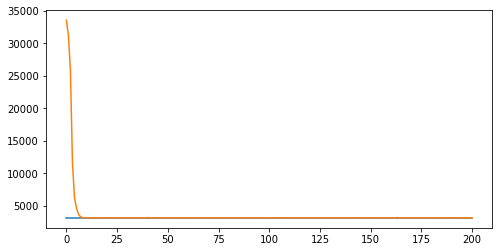

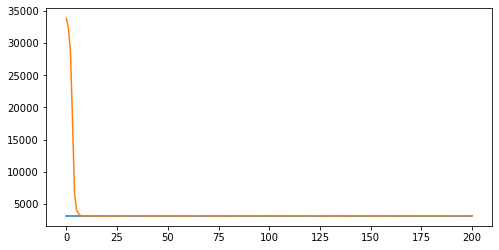

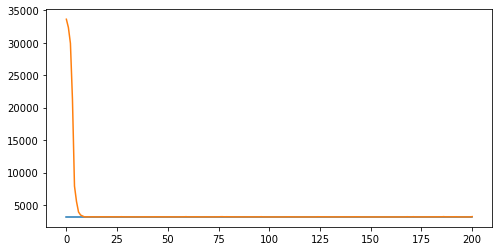

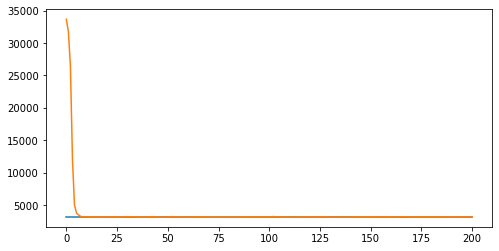

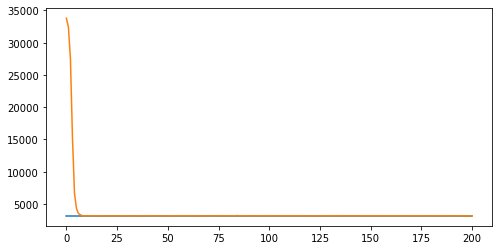

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,3157.0,3157.00,3157.0,26.319511
1,100.0,4277.0,3189.58,3157.0,27.870709
2,150.0,4652.0,3201.68,3157.0,27.926145
3,200.0,3157.0,3157.00,3157.0,26.121924
4,250.0,4861.0,3174.04,3157.0,26.305442


In [27]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 0.1
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "s"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

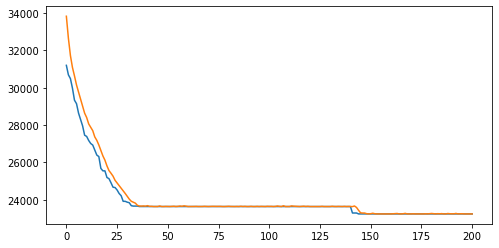

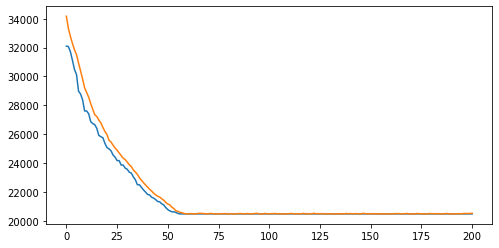

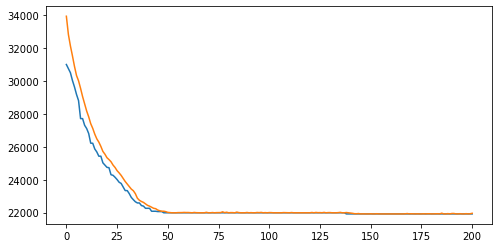

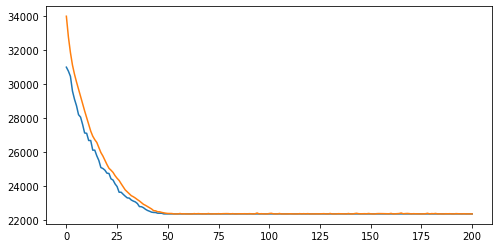

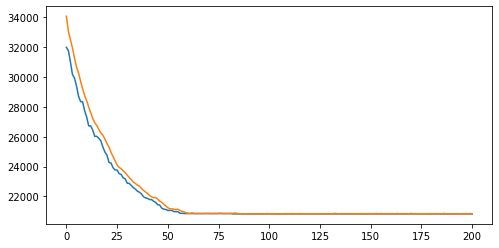

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,23239.0,23239.00,23239.0,21.609607
1,100.0,22017.0,20525.40,20481.0,23.495881
2,150.0,23289.0,21953.94,21916.0,22.993316
3,200.0,22363.0,22363.00,22363.0,22.069810
4,250.0,20934.0,20821.14,20820.0,21.705271


In [31]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 0.1
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

## Algoritmo Genético CHC

In [17]:
def inicializaPoblacion(tamPobla, tam, siembraGreedy):
    poblacion = []
    costePobla = []
    if siembraGreedy == "s":
        for i in range(0, tamPobla - 1):
            solucion = solucionAleatoria2(tam)
            poblacion.append(solucion)
            costePobla.append(calculaCoste(solucion))
            
        # Siembro una solución greedy
        resGreedy, coste = greedy(x, y,"n")
        poblacion.append(resGreedy)
        costePobla.append(coste)
        
    else:
        for i in range(0, tamPobla):
            solucion = solucionAleatoria2(tam)
            poblacion.append(solucion)
            costePobla.append(calculaCoste(solucion))
    
    return poblacion, costePobla

In [18]:
def selectR(poblacion, costePoblacion):
    tam = len(poblacion)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        poblacion[i], poblacion[rnd] = poblacion[rnd], poblacion[i]
        costePoblacion[i], costePoblacion[rnd] = costePoblacion[rnd], costePoblacion[i]
    return poblacion, costePoblacion

In [19]:
def recombine(poblacion, d):
    nuevaPoblacion  = []
    nuevoCostePoblacion = []
    
    iterador = 0
    numIteraciones = round(len(poblacion) / 2)
    while iterador < numIteraciones:
        
        padre1 = poblacion[iterador]
        padre2 = poblacion[iterador + 1]
        
        # Calculo la distancia de Hamming        
        distancia = distanciaHamming( padre1, padre2)
        
        if (distancia/2) > d:
            hijo1, hijo2 = cruceCHC(padre1, padre2, distancia)
            nuevaPoblacion.append(hijo1)
            nuevaPoblacion.append(hijo2)
            nuevoCostePoblacion.append(calculaCoste(hijo1))
            nuevoCostePoblacion.append(calculaCoste(hijo2))
        
        iterador = iterador + 2
    
    return nuevaPoblacion, nuevoCostePoblacion

In [20]:
def cruceCHC(padre1, padre2, distancia):
    hijo1 = []
    hijo2 = []
    
    lim = round(distancia/2)
    controlador = 0
    
    # Coloco las posiciones iguales
    tam = len(padre1)
    for i in range(0,tam):
        if padre1[i] == padre2[i]:
            hijo1.append(padre1[i])
            hijo2.append(padre1[i])
        else:
            hijo1.append(-1)
            hijo2.append(-1)
        
    # Coloco los del padre1 y/o padre2 sin estar repetidos
    for i in range(0, tam):
        if padre1[i] != padre2[i]:
            if controlador < lim:
                controlador = controlador + 1
                if padre1[i] not in hijo1:
                    hijo1[i] = padre1[i]
                if padre2[i] not in hijo2:
                    hijo2[i] = padre2[i]
                    
            else:
                if padre2[i] not in hijo1:
                    hijo1[i] = padre2[i]
                if padre1[i] not in hijo2:
                    hijo2[i] = padre1[i]
    
    # Relleno los valores -1
    npHijo1 = np.array(hijo1)
    npHijo2 = np.array(hijo2)
    
    posHijo1 = np.where(npHijo1 == -1)
    posHijo2 = np.where(npHijo2 == -1)
    
    nodos = list(range(0,len(padre1)))
    
    for pos in posHijo1[0]:
        for i in padre2:
            if i not in hijo1:
                hijo1[int(pos)] = i
                break
    
    for pos in posHijo2[0]:
        for i in padre1:
            if i not in hijo2:
                hijo2[int(pos)] = i
                break
                
    return hijo1, hijo2

In [21]:
def distanciaHamming( padre1, padre2):
    tam = len(padre1)
    distancia = 0
    for i in range(0, tam):
        if padre1[i] != padre2[i]:
            distancia = distancia + 1
    return distancia

In [22]:
def selectS(poblacion, costePoblacion, nuevaPoblacion, nuevoCostePoblacion, tamPobla):
    
    resultPoblacion = []
    resultCoste = []
    
    poblacionTotal = poblacion + nuevaPoblacion
    costeTotal = costePoblacion + nuevoCostePoblacion
    
    aux = costeTotal.copy()
    aux.sort()
    aux = np.array(aux)
    
    numHijos = 0
    
    it = 0        
    while it < tamPobla:
        minimo = np.where(costeTotal == aux[it])
        maxlen = len(minimo[0])
        z = 0
        while z < maxlen and it < tamPobla:
            candidato = poblacionTotal[int(minimo[0][z])]
            resultPoblacion.append(poblacionTotal[int(minimo[0][z])])
            if candidato in nuevaPoblacion:
                numHijos += 1
            resultCoste.append(aux[it])
            it += 1
            z += 1
    
    return resultPoblacion, resultCoste, numHijos

In [23]:
def diverge(mejor, costeMejor, tamPobla):
    poblacion = []
    poblacion.append(mejor)
    costePoblacion = []
    costePoblacion.append(costeMejor)
        
    numCambiosMin = round(len(mejor) * 0.35)
        
    random.seed(costeMejor)
        
    for i in range(1, tamPobla):
        aux = mejor.copy()
        for c in range(0,numCambiosMin):
            rnd1 = random.randint(0, len(mejor) - 1)
            rnd2 = random.randint(0, len(mejor) - 1)
            aux[rnd1], aux[rnd2] = aux[rnd2], aux[rnd1]
        
        poblacion.append(aux)
        costePoblacion.append(calculaCoste(aux))        
           
    return poblacion, costePoblacion    

In [24]:
def geneticoCHC(x, y, greed, tamPobla, tam, numReinicializaciones):
    analisisResultado = []
    for sem in range(0,5):
        resultadoIntermedio = []
        tic()
        semilla = ( sem + 1 ) * 50
        random.seed(semilla)
        cMedia = []
        cMejor = []
    
        # Inicializo límite de cruce
        d = round(tam/4)

        # Inicializo poblacion
        poblacion, costePoblacion = inicializaPoblacion(tamPobla, tam,  greed)

        cMedia.append(statistics.mean(costePoblacion))
        cMejor.append(min(costePoblacion))
        
        iterador = 0
        while iterador <= numReinicializaciones:

            # Selectr
            poblacion, costePoblacion = selectR(poblacion, costePoblacion)
            
            # Recombine y evaluate
            nuevaPoblacion, nuevoCostePoblacion = recombine(poblacion, d)

            ## Selección elite, me quedo con los tamPobl mejores
            poblacion, costePoblacion, numHijos = selectS(poblacion, costePoblacion, nuevaPoblacion, nuevoCostePoblacion, tamPobla)

            ## Reduzco d, si ninguno se ha cruzado
            if numHijos == 0:
                d = d - 1

            if d < 0:
                costeMejor = min(costePoblacion)
                pos = np.where(np.array(costePoblacion) == costeMejor )
                mejor = poblacion[int(pos[0][0])]
                poblacion, costePoblacion = diverge(mejor, costeMejor, tamPobla)
                iterador = iterador + 1
                d = round(tam/4)

            if iterador < numReinicializaciones:
                cMedia.append(statistics.mean(costePoblacion))
                cMejor.append(min(costePoblacion))
        
        t = toc()
        resultadoIntermedio.append(semilla)
        resultadoIntermedio.append(max(costePoblacion))
        resultadoIntermedio.append(statistics.mean(costePoblacion))
        resultadoIntermedio.append(min(costePoblacion))
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)   
        
        plt.figure(figsize=(8, 4))
        plt.plot(cMejor)
        plt.plot(cMedia)
        plt.show()
        
    representaResultados2(analisisResultado, "AG-CHC")

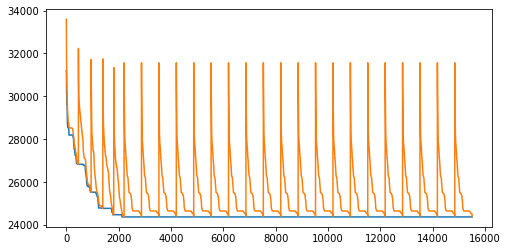

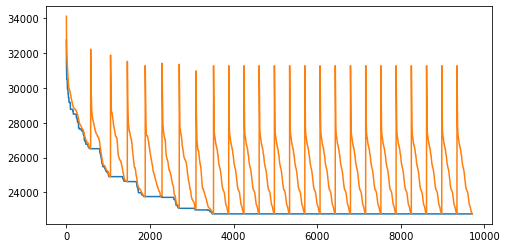

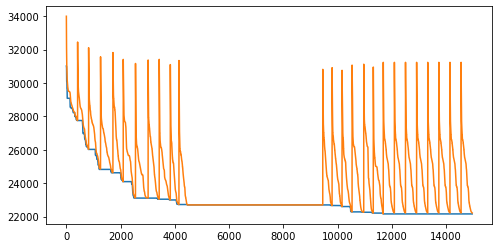

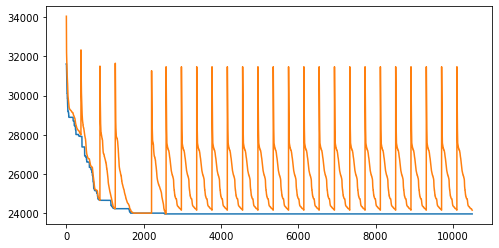

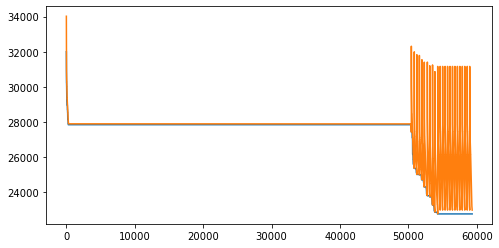

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,33841.0,31559.18,24364.0,334.870632
1,100.0,33266.0,31277.28,22755.0,291.157379
2,150.0,33605.0,31232.66,22164.0,354.022375
3,200.0,33493.0,31472.18,23960.0,274.730006
4,250.0,33359.0,31158.52,22743.0,2081.921144


In [25]:
tamPobla = 50
tam = len(x)
numReinicializaciones = 25
greed = "n"
random.seed(tamPobla * numReinicializaciones)

geneticoCHC(x, y, greed, tamPobla, tam, numReinicializaciones)

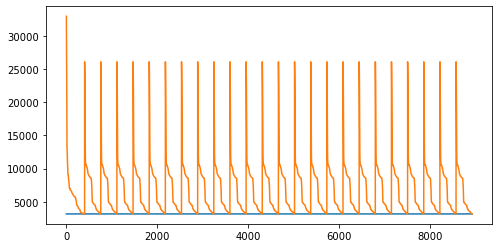

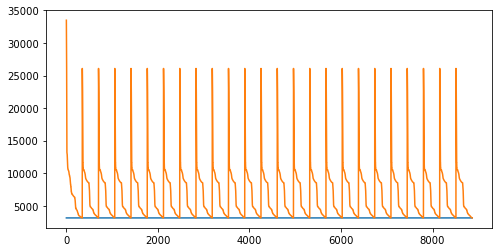

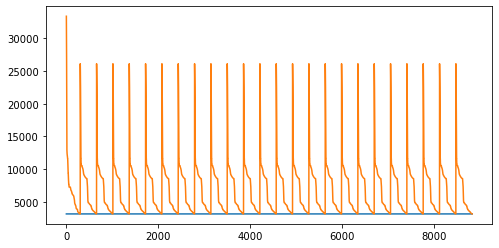

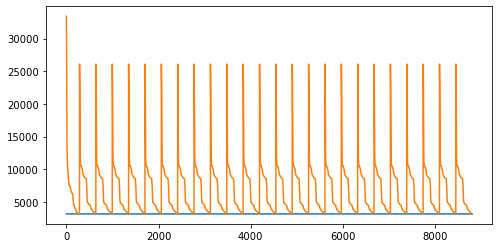

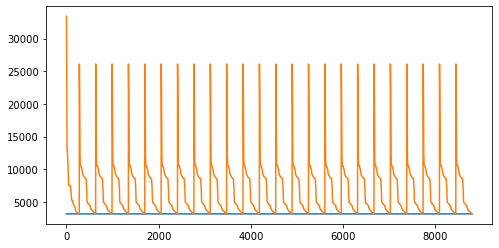

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,29409.0,26095.6,3157.0,319.581896
1,100.0,29409.0,26095.6,3157.0,354.457617
2,150.0,29409.0,26095.6,3157.0,358.971567
3,200.0,29409.0,26095.6,3157.0,317.626839
4,250.0,29409.0,26095.6,3157.0,319.985889


In [30]:
tamPobla = 50
tam = len(x)
numReinicializaciones = 25
greed = "s"
random.seed(tamPobla * numReinicializaciones)

geneticoCHC(x, y, greed, tamPobla, tam, numReinicializaciones)

## Algoritmo Genético Multimodal

In [31]:
def seleccionTorneo(poblacion, costePobla, tamTorneo, tamPobla):
    minimo = max(costePobla)
    pad = 0
    for selecc in range(0, tamTorneo):
        cand = random.randint(0,tamPobla - 1)
        coste = costePobla[cand]
        if (coste < float("inf")) and (coste < minimo ):
            minimo = coste
            pad = cand
    return poblacion[pad]

In [32]:
def mutaSolucion(wBest, s):
    n = len(wBest)

    pivote1 = random.randint(0,n - 1)
    pivote2 = pivote1 + s

    if pivote2 > (n - 1):
        pivote2 = n - 1

    sublista = wBest[pivote1:pivote2 + 1]

    tam = len(sublista)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        sublista[i], sublista[rnd] = sublista[rnd], sublista[i]

    wBest[pivote1:pivote2 + 1] = sublista
    return wBest

In [33]:
def cruce(padre1, padre2, porTSublista):
    
    n = len(padre1)
    
    tSublista = round(n * porTSublista)
    
    pivote1 = random.randint(0,n - 2)
    pivote2 = pivote1 + tSublista + 1
        
    if pivote2 > n:
        pivote2 = n
    
    sublista = padre1[pivote1:pivote2]
    
    descendiente = list(range(0,n))
    descendiente[pivote1:pivote2] = sublista
    
    for i in range(0,n):
        if i < pivote1 or i >= pivote2:
            for k in range(0,len(padre2)):
                ciu = padre2[k]
                if ciu not in sublista:
                    descendiente[i] = ciu
                    padre2.remove(ciu)
                    break

    return descendiente

In [34]:
def generaPoblacion(x, y, greed, tam, tamPobla):
    poblacion = []
    costePobla = []
    
    if greed == "s":
        for i in range(0, tamPobla - 1):
            solucion = solucionAleatoria2(tam)
            poblacion.append(solucion)
            costePobla.append(calculaCoste(solucion))

     # Siembro una solución greedy
        resGreedy, coste = greedy(x, y,"n")
        poblacion.append(resGreedy)
        costePobla.append(coste)

    else:
        for i in range(0, tamPobla):
            solucion = solucionAleatoria2(tam)
            poblacion.append(solucion)
            costePobla.append(calculaCoste(solucion))
    
    return poblacion, costePobla

In [35]:
def distanciaHamming( padre1, padre2):
    tam = len(padre1)
    distancia = 0
    for i in range(0, tam):
        if padre1[i] != padre2[i]:
            distancia = distancia + 1
    return distancia

In [36]:
def ordenaPoblacion(poblacion, costePobla):
    costePoblaOrdenada, poblacionOrdenada = map(list, zip(*sorted(zip(costePobla, poblacion))))
    return poblacionOrdenada, costePoblaOrdenada

In [37]:
def aclaraPoblacion(poblacion, costePobla, radioNicho, Kappa):
    for i in range(0, len(poblacion)):
        if costePobla[i] != float("inf"):
            numGanadores = 1
            for j in range(i + 1, len(poblacion)):
                if (costePobla[j] != float("inf")) and (distanciaHamming( poblacion[i], poblacion[j]) < radioNicho): 
                    if numGanadores < Kappa:
                        numGanadores += 1
                    else:
                        costePobla[j] = float("inf")
    
    return poblacion, costePobla    

In [38]:
def geneticoMultimodal(x, y, greed, iteracionesSinMejora, tam, tamPobla, tamTorneo, porTSublista, tamMutacion, probabilidadMutacion, numIteraciones, radioNicho, Kappa):
    analisisResultado = []
    for sem in range(0,5):
        resultadoIntermedio = []
        tic()
        semilla = ( sem + 1 ) * 50
        random.seed(semilla)
        cMedia = []
        cMejor = []
    
        limBuclue = ((tamPobla/2) - 0.1 * tamPobla)

        # Creación de población inicial
        poblacion = []
        costePobla = []
        poblacion, costePobla = generaPoblacion(x, y, greed, tam, tamPobla);

        cMedia.append(statistics.mean(costePobla))
        cMejor.append(min(costePobla))
        
        iterador = 0
        while iterador < iteracionesSinMejora:

            poblacion, costePobla = ordenaPoblacion(poblacion, costePobla)
            poblacion, costePobla = aclaraPoblacion(poblacion, costePobla, radioNicho, Kappa)

            nuevaPoblacion = []
            nuevoCostePoblacion = []

            mejorPadre = min(costePobla)

            it = 0    
            while it < limBuclue:

                padre1 = seleccionTorneo(poblacion, costePobla, tamTorneo, tamPobla)
                padre2 = seleccionTorneo(poblacion, costePobla, tamTorneo, tamPobla)

                descendiente1 = cruce(padre1.copy(), padre2.copy(), porTSublista)
                descendiente2 = cruce(padre2.copy(), padre1.copy(), porTSublista)

                # Probabilidad de mutacion
                dado1 = random.random()
                dado2 = random.random()

                if dado1 <= probabilidadMutacion:
                    descendiente1 = mutaSolucion(descendiente1, tamMutacion)

                if dado2 <= probabilidadMutacion:
                    descendiente2 = mutaSolucion(descendiente2, tamMutacion)

                costeDescendiente1 = calculaCoste(descendiente1)
                costeDescendiente2 = calculaCoste(descendiente2) 

                nuevaPoblacion.append(descendiente1)
                nuevaPoblacion.append(descendiente2)

                nuevoCostePoblacion.append(costeDescendiente1)
                nuevoCostePoblacion.append(costeDescendiente2)

                it += 1

            i = 0
            while len(nuevaPoblacion) < tamPobla:
                nuevaPoblacion.append(poblacion[i])
                nuevoCostePoblacion.append(costePobla[i])
                i += 1   

            poblacion,costePobla = ordenaPoblacion(nuevaPoblacion, nuevoCostePoblacion)

            cMedia.append(statistics.mean(costePobla))
            cMejor.append(min(costePobla))
            
            mejorHijo = min(costePobla)

            if (mejorHijo < mejorPadre):
                iterador = 0
            else:
                iterador +=1
        t = toc()
        resultadoIntermedio.append(semilla)
        resultadoIntermedio.append(max(costePobla))
        resultadoIntermedio.append(statistics.mean(costePobla))
        resultadoIntermedio.append(min(costePobla))
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)   
        
        #plt.figure(figsize=(8, 4))
        #plt.plot(cMejor)
        #plt.plot(cMedia)
        #plt.show()
        
    representaResultados2(analisisResultado, "AG-Multimodal")

In [39]:
greed = "s"
tam = len(x)
tamPobla = 50
iteracionesSinMejora = 1000 * 2 / tamPobla
tamTorneo = round(tamPobla * 0.05)
porTSublista = 0.1
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.1
numIteraciones = 5

radioNicho = round(0.1 * len(x))
Kappa = 5

geneticoMultimodal(x, y, greed, iteracionesSinMejora, tam, tamPobla, tamTorneo, porTSublista, tamMutacion, probabilidadMutacion, numIteraciones, radioNicho, Kappa)

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,inf,inf,3157.0,3.731795
1,100.0,inf,inf,3157.0,3.546247
2,150.0,inf,inf,3157.0,3.741259
3,200.0,inf,inf,3157.0,3.773494
4,250.0,inf,inf,3157.0,3.580491


In [41]:
greed = "s"
tam = len(x)
tamPobla = 50
iteracionesSinMejora = 1000 * 2 / tamPobla
tamTorneo = round(tamPobla * 0.05)
porTSublista = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.1
numIteraciones = 5

radioNicho = round(0.1 * len(x))
Kappa = 5

geneticoMultimodal(x, y, greed, iteracionesSinMejora, tam, tamPobla, tamTorneo, porTSublista, tamMutacion, probabilidadMutacion, numIteraciones, radioNicho, Kappa)

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,inf,inf,3157.0,19.460394
1,100.0,inf,inf,3148.0,25.500266
2,150.0,inf,inf,3157.0,20.484504
3,200.0,inf,inf,3157.0,24.507029
4,250.0,inf,inf,3157.0,23.264521


In [40]:
greed = "n"
tam = len(x)
tamPobla = 50
iteracionesSinMejora = 1000 * 2 / tamPobla
tamTorneo = round(tamPobla * 0.05)
porTSublista = 0.1
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.1
numIteraciones = 5

radioNicho = round(0.1 * len(x))
Kappa = 5

geneticoMultimodal(x, y, greed, iteracionesSinMejora, tam, tamPobla, tamTorneo, porTSublista, tamMutacion, probabilidadMutacion, numIteraciones, radioNicho, Kappa)

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,inf,inf,19754.0,37.561683
1,100.0,inf,inf,20622.0,23.808072
2,150.0,inf,inf,17536.0,57.790044
3,200.0,inf,inf,18592.0,56.465166
4,250.0,inf,inf,20178.0,23.680118


In [42]:
greed = "n"
tam = len(x)
tamPobla = 50
iteracionesSinMejora = 1000 * 2 / tamPobla
tamTorneo = round(tamPobla * 0.05)
porTSublista = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.1
numIteraciones = 5

radioNicho = round(0.1 * len(x))
Kappa = 5

geneticoMultimodal(x, y, greed, iteracionesSinMejora, tam, tamPobla, tamTorneo, porTSublista, tamMutacion, probabilidadMutacion, numIteraciones, radioNicho, Kappa)

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,inf,inf,18305.0,215.355993
1,100.0,inf,inf,20060.0,122.686543
2,150.0,inf,inf,19486.0,204.966133
3,200.0,inf,inf,20602.0,105.214487
4,250.0,inf,inf,19199.0,213.555303
